In [269]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,osumidata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 18 fitted parameters, 10 of which have a bayesian prior
Total Residual:                        748.4
Components of residual:
Concentration Trajectories (Figure 2): 335.7
Initial Reaction Rate (Figure 3A):     64.0
Mg2PPi solubility (Figure 3B):         203.0
Parameter priors:                      86.0
pH Effect Data:                        59.7


In [304]:
include("../modules/IVTmodel.jl")

plotMg2PPiphasediagram (generic function with 1 method)

In [305]:
df = CSV.read("../data/external/guo/guoMgNTP.csv", DataFrame)
guodata = Matrix(df)
df = CSV.read("../data/external/samnuan/samnuanMgNTP.csv", DataFrame)
sammnuandata = Matrix(df)
df = CSV.read("../data/akama_data/akamaMgNTP.csv", DataFrame)
akamadata = Matrix(df);

LoadError: ArgumentError: "../data/external/samnuan/samnuanMgNTP.csv" is not a valid file or doesn't exist

In [284]:
testparameterslist = [4.104439617848896
  5.240452472994456
  5.724320825981994
 -3.711434632667355
 -4.273027292073779
  0.5079044947641198
 -4.823390777000488
 -7.529141157549921
 -9.283319644767865
  1.1585755684648662
  0.36251027432429683
  1.6560162677563521
  4.46133324278156
  3.8900333974504906
  5.391069339838695
  4.23538115887709
 -3.9383229007411322]

17-element Vector{Float64}:
  4.104439617848896
  5.240452472994456
  5.724320825981994
 -3.711434632667355
 -4.273027292073779
  0.5079044947641198
 -4.823390777000488
 -7.529141157549921
 -9.283319644767865
  1.1585755684648662
  0.36251027432429683
  1.6560162677563521
  4.46133324278156
  3.8900333974504906
  5.391069339838695
  4.23538115887709
 -3.9383229007411322

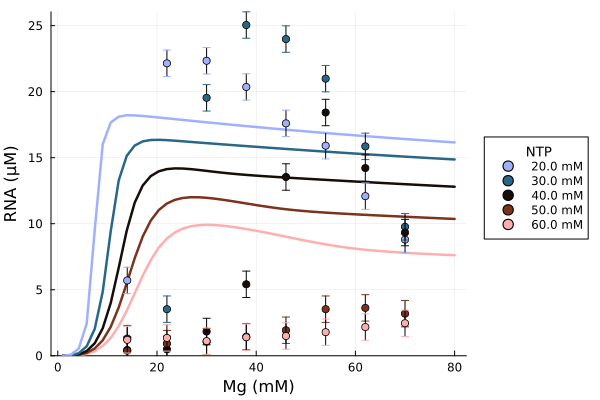

In [302]:
plotratebyMg(fittingmodel,guodata,testparameterslist, akamafittedcovariancematrix; showconfidence = false, NaperNTP = 3.77)

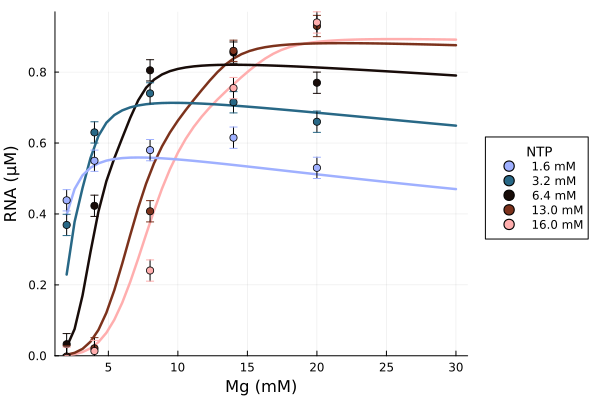

In [286]:
plotratebyMg(fittingmodel,akamadata,testparameterslist, akamafittedcovariancematrix;T7RNAP = 1e-7, DNA = 7.4, finaltime = 5/60, PPiase = 0, stoich = (231,246,189,202), datastddev = 0.03,Mgrange = (2e-3,30e-3), nmc = 500, showconfidence = false)

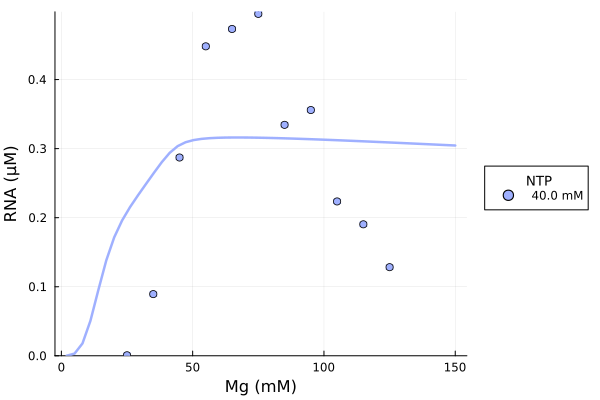

In [300]:
plotratebyMg(fittingmodel,sammnuandata,testparameterslist, akamafittedcovariancematrix; T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.003,Mgrange = (2e-3,150e-3), showconfidence = false, precip = false)